In [30]:
#import data
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (2).csv


In [31]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy
from scipy.cluster import hierarchy
global g
import time

In [32]:
iris_data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']), encoding = 'latin-1')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


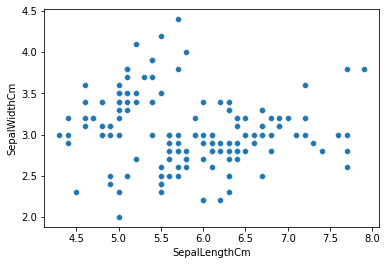

In [33]:
iris_data.drop(['Species'], axis=1, inplace=True)
iris_data = iris_data[['SepalLengthCm', 'SepalWidthCm']]
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_data)

In [26]:
iris = np.asarray(iris_data)
keys = iris.shape[0]
print(keys)

150


In [ ]:
from scipy.spatial.distance import pdist, squareform
Z = squareform(pdist(iris, "euclidean"))

def subtract(indices,splinter):
  l3 = [x for x in indices if x not in splinter]
  return l3

def divisive(a,indices,splinter,sub):
  if(len(indices)==1):
    return
  avg=[]
  flag=0
  for i in indices:
    if(i not in splinter):
      sum=0
      for j in indices:
        if(j not in splinter):
          sum=sum+a[i][j]
      if((len(indices)-len(splinter)-1)==0):
        avg.append(sum)
      else:
        avg.append(sum/(len(indices)-len(splinter)-1))
  if(splinter):
    k=0
    for i in sub:
       total=0
       for j in splinter:
         total=total+a[i][j]
       avg[k]=avg[k] - (total/(len(splinter)))
       k+=1
     positive=[]
     for i in range(0,len(avg)):
       if(avg[i]>0):
        positive.append(avg[i])
         flag=1
     if(flag==1):
        splinter.append(sub[avg.index(max(positive))])
        sub.remove(sub[avg.index(max(positive))])
        divisive(a,indices,splinter,sub)
    else:
     splinter.append(indices[avg.index(max(avg))])
     sub[:]=subtract(indices,splinter)
     divisive(a,indices,splinter,sub)

def original_subset(indices):
  sp=np.zeros(shape=(len(indices),len(indices)))
  for i in range(0,len(indices)):
    for j in range(0,len(indices)):
      sp[i][j]=a[indices[i]][indices[j]]
  return sp

def original_max(x):
  new=original_subset(x)
  return new.max()

def diameter(l):
  return original_max(l)

def recursive(a,indices,u,v,cluster,g):
  clus_s.append(len(indices))
  d.append(diameter(indices))
  parents[g]=indices
  g-=1
  divisive(a,indices,u,v)
  cluster.append(u)
  cluster.append(v)
  new=[]
  for i in range(len(cluster)):
    new.append(cluster[i])
  final.append(new)
  x=[]
  y=[]
  store_list=[]
  max=-1
  f=0
  for list in clusters:
    if(diameter(list)>max):
      if(len(list)!=1):
        f=1
        max=diameter(list)
        store_list=(list)
  if(f==0):
    return
  else:
    clusters.remove(store_list)
    recursive(a,store_list,x,y,clusters,g)
  
def augmented_dendogram(*args, **kwargs):
  data = scipy.cluster.hierarchy.dendrogram(*args, **kwargs)
  if not kwargs.get('no_plot', False):
    for i, d in zip(data['icoord'], data['dcoord']):
      x = 0.5 * sum(i[1:3])
      y = d[1]
      plt.plot(x, y, 'ro')
      plt.annotate("%.3g" % y, (x, y), xytext=(0,12), textcoords='offset points', va='top', ha='center')
  return data

from scipy.spatial.distance import pdist, squareform

Z = squareform(pdist(iris, "euclidean"))
a=Z
size=len(a)
g=(size-1)*2
parents={}
final=[]
clusters=[]
indices=[]
clus_s=[]
d=[]
Z=np.zeros(shape=(size-1,4))
p=[]
q=[]
ans=[]
for i in range(0,len(a)):
  indices.append(i)

for i in range(0,size):
  list=[]
  list.append(i)
  parents[i]=list
print(parents)
start=time.time()
recursive(a,indices,p,q,clusters,g)
print("Clustering done\t" + str(time.time()-start))
for i in range(0,len(d)):
  Z[size-i-2][2]=d[i]
  Z[size-i-2][3]=clus_s[i]

for i in range(len(final)-1,0,-1):
  for j in range(0,len(final[i-1])):
    if final[i-1][j] not in final[i]:
      ans.append(final[i-1][j])

ans.append(indices)

for i in range(0,len(ans)):
  if (len(ans[i])<=2):
    Z[i][0]=ans[i][0]
    Z[i][1]=ans[i][1]
  else:
    s=0
    add=[]
    common=[]
    for j in range(len(ans)-1,-1,-1):
      if(set(ans[j])<set(ans[i])):
        common=ans[j]
        break;
    x=(subtract(ans[i],common))
    for key in parents.keys():
      if(parents[key]==common):
        Z[i][0]=key
        break;
    for key in parents.keys():
      if(set(parents[key])==set(x)):
        Z[i][1]=key
        s=1
        break;
    if(s==0):
      print(Z[i][0],Z[i],[1],x)

names=[i for i in range(0,size)]
plt.figure(figsize=(20,20))
plt.title('Divisive Hierarchical Clustering')
plt.xlabel('Sequence No.')
plt.ylabel('Distance')
augmented_dendogram(Z)
plt.show()